In [3]:
# Importing all the required packages and loading the data
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
df_train = pd.read_csv("Data.csv")

In [6]:
# Checking the shape of data and summary of data
print(df_train.shape)
df_train.describe()

(9557, 143)


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.325416,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.697118,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [5]:
# Filling the v18q1 (number of households that owns tablet) filling it with zero for NA values as the minimum value of v18q1 is 1
# and households that do not have a tablet are not represented.
df_train['v18q1']=df_train['v18q1'].fillna(0)
df_train.isnull().sum(axis=0)

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1                 0
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
                   ... 
bedrooms              0
overcrowding          0
tipovivi1             0
tipovivi2             0
tipovivi3             0
tipovivi4             0
tipovivi5             0
computer              0
television            0
mobilephone           0
qmobilephone    

In [8]:
# Dropping the squared columns as the data is redundant
df_train = df_train.drop(columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'])

In [9]:
# Dropping the redundant attributes
print(df_train['hhsize'].corr(df_train['tamhog']))
print(df_train['hogar_total'].corr(df_train['tamhog']))
print(df_train['r4t3'].corr(df_train['tamhog']))
df_train = df_train.drop(columns = ['r4t3', 'hogar_total', 'hhsize'])

In [7]:
# Since only two areas are described in the data dropping one wolud not cause the loss of data
df_train = df_train.drop(columns = ['area2'])

In [12]:
# Dropping all the columns that describe about the relationship of that person in the household
df_train = df_train.drop(columns = ['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7'])
df_train = df_train.drop(columns = ['parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12'])

In [13]:
# Dropping this columns as male column already has the same data
df_train = df_train.drop(columns = ['female'])

In [14]:
# Dropping these columns as they give details regaring those people who do not contribute in generating the income
df_train = df_train.drop(columns = ['mobilephone', 'r4h1', 'r4h2', 'r4m1', 'r4m2', 'r4t1', 'r4t2','v2a1', 'rez_esc'])

In [18]:
# Making the value of rent equals zero to all rows who have an own house
df_train.loc[(df_train['tipovivi1'] == 1), 'v2a1'] = 0

In [20]:
# Finding number of people who belong to working age and storing them in hogar_adul
df_train['hogar_adul'] = df_train['hogar_adul'] - df_train['hogar_mayor']

In [21]:
# Finding number of people who does not belong to working age and storing them in hogar_nin
df_train['hogar_nin'] = df_train['hogar_nin'] + df_train['hogar_mayor']

In [22]:
# Dropping unused column
df_train = df_train.drop(columns = ['hogar_mayor'])
#print(df_train[['hogar_adul', 'hogar_nin']])

In [26]:
df_train.shape

(9557, 102)

In [28]:
# Combining all the attributes that describe about walls and dropping the remaining columns
walls = []
for i, row in df_train.iterrows():
    if row['epared1'] == 1:
        walls.append(1)
    elif row['epared2'] == 1:
        walls.append(2)
    elif row['epared3'] == 1:
        walls.append(3)
    else:
        walls.append(np.nan)
df_train['walls'] = walls

df_train = df_train.drop(columns = ['epared1', 'epared2', 'epared3'])
df_train.shape

In [31]:
# Combining all the attributes that describe about roof and dropping the remaining columns
roof = []
for i, row in df_train.iterrows():
    if row['etecho1'] == 1:
        roof.append(1)
    elif row['etecho2'] == 1:
        roof.append(2)
    elif row['etecho3'] == 1:
        roof.append(3)
    else:
        roof.append(np.nan)
df_train['roof'] = roof

df_train = df_train.drop(columns = ['etecho1', 'etecho2', 'etecho3'])
df_train.shape

(9557, 98)

In [33]:
# Combining all the attributes that describe about floor and dropping the remaining columns
floor = []
for i, row in df_train.iterrows():
    if row['eviv1'] == 1:
        floor.append(1)
    elif row['eviv2'] == 1:
        floor.append(2)
    elif row['eviv3'] == 1:
        floor.append(3)
    else:
        floor.append(np.nan)
df_train['floor'] = floor

df_train = df_train.drop(columns = ['eviv1', 'eviv2', 'eviv3'])
df_train.shape

(9557, 96)

In [40]:
df_train = df_train[['Id', 'idhogar', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig',
       'v18q1', 'r4h3', 'r4m3', 'tamhog', 'tamviv', 'escolari',
       'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad',
       'paredzinc', 'paredfibras', 'paredother', 'pisomoscer',
       'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene',
       'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
       'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
       'abastaguano', 'public', 'planpri', 'noelec', 'coopele',
       'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
       'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3',
       'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3',
       'elimbasu4', 'elimbasu5', 'elimbasu6', 'dis', 'male',
       'parentesco1', 'hogar_nin', 'hogar_adul', 'dependency',
       'edjefe', 'edjefa', 'meaneduc', 'instlevel1', 'instlevel2',
       'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6',
       'instlevel7', 'instlevel8', 'instlevel9', 'bedrooms',
       'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4',
       'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1',
       'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'age', 'walls', 'roof', 'floor', 'Target']]
df_train

,Id,idhogar,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h3,...,lugar3,lugar4,lugar5,lugar6,area1,age,walls,roof,floor,Target
0,ID_279628684,21eb7fcc1,190000.0,0,3,0,1,1,0.0,1,...,0,0,0,0,1,43,2,1,1,4
1,ID_f29eb3ddd,0e5d7a658,135000.0,0,4,0,1,1,1.0,1,...,0,0,0,0,1,67,2,2,2,4
2,ID_68de51c94,2c7317ea8,0.0,0,8,0,1,1,0.0,0,...,0,0,0,0,1,92,2,3,3,4
3,ID_d671db89c,2b58d945f,180000.0,0,5,0,1,1,1.0,2,...,0,0,0,0,1,17,3,3,3,4
4,ID_d56d6f5f5,2b58d945f,180000.0,0,5,0,1,1,1.0,2,...,0,0,0,0,1,37,3,3,3,4
5,ID_ec05b1a7b,2b58d945f,180000.0,0,5,0,1,1,1.0,2,...,0,0,0,0,1,38,3,3,3,4
6,ID_e9e0c1100,2b58d945f,180000.0,0,5,0,1,1,1.0,2,...,0,0,0,0,1,8,3,3,3,4
7,ID_3e04e571e,d6dae86b7,130000.0,1,2,0,1,1,0.0,1,...,0,0,0,0,1,7,1,1,2,4
8,ID_1284f8aad,d6dae86b7,130000.0,1,2,0,1,1,0.0,1,...,0,0,0,0,1,30,1,1,2,4
9,ID_51f52fdd2,d6dae86b7,130000.0,1,2,0,1,1,0.0,1,...,0,0,0,0,1,28,1,1,2,4


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 96 columns):
Id                 9557 non-null object
idhogar            9557 non-null object
v2a1               8608 non-null float64
hacdor             9557 non-null int64
rooms              9557 non-null int64
hacapo             9557 non-null int64
v14a               9557 non-null int64
refrig             9557 non-null int64
v18q1              9557 non-null float64
r4h3               9557 non-null int64
r4m3               9557 non-null int64
tamhog             9557 non-null int64
tamviv             9557 non-null int64
escolari           9557 non-null int64
rez_esc            9207 non-null float64
paredblolad        9557 non-null int64
paredzocalo        9557 non-null int64
paredpreb          9557 non-null int64
pareddes           9557 non-null int64
paredmad           9557 non-null int64
paredzinc          9557 non-null int64
paredfibras        9557 non-null int64
paredother         9557 non

In [46]:
for df in [df_train]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace('no',0)
    df['dependency'] = df['dependency'].replace('yes',1)
    df['edjefa'] = df['edjefa'].replace('no',0)
    df['edjefa'] = df['edjefa'].replace('yes',1)
    df['edjefe'] = df['edjefe'].replace('no',0)
    df['edjefe'] = df['edjefe'].replace('yes',1)

df_train[['dependency', 'edjefa', 'edjefe']].describe()
newdf=df_train[[ 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig',
       'v18q1', 'r4h3', 'r4m3', 'tamhog', 'tamviv', 'escolari',
       'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad',
       'paredzinc', 'paredfibras', 'paredother', 'pisomoscer',
       'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene',
       'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
       'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
       'abastaguano', 'public', 'planpri', 'noelec', 'coopele',
       'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
       'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3',
       'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3',
       'elimbasu4', 'elimbasu5', 'elimbasu6', 'dis', 'male',
       'parentesco1', 'hogar_nin', 'hogar_adul', 'dependency',
       'edjefe', 'edjefa', 'meaneduc', 'instlevel1', 'instlevel2',
       'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6',
       'instlevel7', 'instlevel8', 'instlevel9', 'bedrooms',
       'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4',
       'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1',
       'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'age', 'walls', 'roof', 'floor']]

target=df_train['Target'].values
newdf['dependency']=pd.to_numeric(newdf['dependency'])
newdf['edjefe']=pd.to_numeric(newdf['edjefe'])
newdf['edjefa']=pd.to_numeric(newdf['edjefa'])

newdf.info()
target_index={1:0,2:1,3:2,4:3}
target=np.array([target_index[c] for c in target])


newdf['meaneduc']=newdf['meaneduc'].fillna(0)
newdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 93 columns):
v2a1               8608 non-null float64
hacdor             9557 non-null int64
rooms              9557 non-null int64
hacapo             9557 non-null int64
v14a               9557 non-null int64
refrig             9557 non-null int64
v18q1              9557 non-null float64
r4h3               9557 non-null int64
r4m3               9557 non-null int64
tamhog             9557 non-null int64
tamviv             9557 non-null int64
escolari           9557 non-null int64
rez_esc            9207 non-null float64
paredblolad        9557 non-null int64
paredzocalo        9557 non-null int64
paredpreb          9557 non-null int64
pareddes           9557 non-null int64
paredmad           9557 non-null int64
paredzinc          9557 non-null int64
paredfibras        9557 non-null int64
paredother         9557 non-null int64
pisomoscer         9557 non-null int64
pisocemento        9557 non-n

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [88]:
### Light GBM Model ##


from sklearn.model_selection import train_test_split


X = newdf
Y = target
X, X_test, Y, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=100)

In [89]:
import lightgbm as lgb
train_data = lightgbm.Dataset(X, label=Y)
test_data = lightgbm.Dataset(X_test, label=Y_test)



params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced',
                    'objective':'multiclass',
                      'num_class':4
                    }

                       random_state = 10)

model = lgb.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=4000)
                       

num_round = 10
lgb.cv(params, train_data, num_round, nfold=5)    
    
y=model.predict(X_test)
print(y)

import numpy
a = numpy.asarray(y)
print(y)

numpy.savetxt("foo.csv", a, delimiter=",")

[1]	valid_0's multi_logloss: 1.03334
[2]	valid_0's multi_logloss: 1.02126
[3]	valid_0's multi_logloss: 1.01049
[4]	valid_0's multi_logloss: 0.999362
[5]	valid_0's multi_logloss: 0.989146
[6]	valid_0's multi_logloss: 0.978902
[7]	valid_0's multi_logloss: 0.969378
[8]	valid_0's multi_logloss: 0.97294
[9]	valid_0's multi_logloss: 0.963236
[10]	valid_0's multi_logloss: 0.954029
[11]	valid_0's multi_logloss: 0.94517
[12]	valid_0's multi_logloss: 0.948236
[13]	valid_0's multi_logloss: 0.939692
[14]	valid_0's multi_logloss: 0.931392
[15]	valid_0's multi_logloss: 0.923323
[16]	valid_0's multi_logloss: 0.915352
[17]	valid_0's multi_logloss: 0.908481
[18]	valid_0's multi_logloss: 0.901523
[19]	valid_0's multi_logloss: 0.894791
[20]	valid_0's multi_logloss: 0.888125
[21]	valid_0's multi_logloss: 0.890008
[22]	valid_0's multi_logloss: 0.883629
[23]	valid_0's multi_logloss: 0.876714
[24]	valid_0's multi_logloss: 0.870466
[25]	valid_0's multi_logloss: 0.864462
[26]	valid_0's multi_logloss: 0.858418


In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
preds_df=pd.read_csv("foo.csv",header=None)
#preds_df = pd.DataFrame(y,columns=[0,1,2,3])
preds_df.head()
# Convert into predictions
preds = preds_df[[0, 1, 2, 3]].idxmax(axis = 1)


cm_gbm=confusion_matrix(Y_test, preds)
f1_gbm=round(f1_score(Y_test,preds , average = 'macro'), 5)
prec_gbm=precision_score(Y_test, preds, average="macro")
acc_gbm=accuracy_score(Y_test, preds)
rec_gbm=recall_score(Y_test, preds, average="macro")


print('F1 score:',f1_gbm )
print('CM \n',cm_gbm)
print('Precision \n',prec_gbm)
print('Accuracy Score \n',acc_gbm)
print('Recall \n',rec_gbm)



F1 score: 0.88669
CM 
 [[ 130   14    2   15]
 [   5  268   12   38]
 [   2   11  178   26]
 [   1    9    6 1195]]
Precision 
 0.9166066709719789
Accuracy Score 
 0.926255230125523
Recall 
 0.8610597636923291


In [53]:
## MLP CLassifier##
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
import numpy as np

#Initializing
X_b = newdf
y_b = target



X_train, X_test, Y_train, Y_test = train_test_split(X_b, y_b, test_size = 0.2)


mlp = MLPClassifier(activation='relu')
mlp.fit(X_train, Y_train)
y_pred=mlp.predict(X_test)

import numpy
y_new = numpy.asarray(y_pred)





c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [169]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm_mlp=confusion_matrix(Y_test, y_new)
f1_mlp=round(f1_score(Y_test, y_new, average = 'macro'), 5)
prec_mlp=precision_score(Y_test, y_new, average="macro")
acc_mlp=accuracy_score(Y_test,y_new)
rec_mlp=recall_score(Y_test, y_new,average='macro')

print('F1 score:', f1_mlp)
print('CM \n',cm_mlp)
print('Precision \n',prec_mlp)
print('Accuracy Score \n',acc_mlp)
print('Recall \n',rec_mlp)

F1 score: 0.25093
CM 
 [[ 13  21   8 119]
 [ 39  56  26 202]
 [ 11  31  16 159]
 [ 89 175 125 822]]
Precision 
 0.25154278785131073
Accuracy Score 
 0.4743723849372385
Recall 
 0.2516576357603317


In [58]:
## Naive Bayes CLassifier##
from sklearn.naive_bayes import MultinomialNB
import numpy as np

#Initializing
X_nb = newdf
y_nb = target



X_train, X_test, Y_train, Y_test = train_test_split(X_nb, y_nb, test_size = 0.2)

clf = MultinomialNB()
clf.fit(X_train, Y_train)
y_naiveb=mlp.predict(X_test)

import numpy
y_naive = numpy.asarray(y_naiveb)




In [76]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm_nb=confusion_matrix(Y_test, y_naive)
f1_nb=round(f1_score(Y_test, y_naive, average = 'macro'),5)
prec_nb=precision_score(Y_test, y_naive, average="macro")
acc_nb=accuracy_score(Y_test,y_naive) 
rec_nb=recall_score(Y_test, y_naive,average='macro')




,f1_nb,prec_nb,acc_nb,rec_nb


In [177]:
### Neural Network Model  ##


from keras.models import Model #Sequential Models
from keras.layers import Input,Dense #Dense Fully Connected Layer Type
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils


#df_test=df_test.drop(columns=['v2a1', 'rez_esc'])

#Initializing
X_a = newdf
y_a = target

#Hot Encoding target label

encoder = LabelEncoder()
encoder.fit(y_a)
encoded_Y = encoder.transform(y_a)
Y_train=np_utils.to_categorical(encoded_Y)

#Y_train.shape

X_train, X_test, Y_train, Y_test = train_test_split(X_a, Y_train, test_size = 0.2)




inputs =Input(shape=(91,))
x=(Dense(32,activation='relu'))(inputs)
x=(Dense(64, activation='relu'))(x)
predictions=(Dense(4, activation='softmax'))(x)

#Building a model
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#Fitting the model with X train data and Y train data
model.fit(X_train,Y_train,batch_size=200,epochs=50)


#Predicting the model 
import numpy as np
np.set_printoptions(suppress=True)
y_predict=model.predict(X_test,batch_size=200)
print(y_predict)




Epoch 1/50
7645/7645 [==============================] - 0s 37us/step - loss: 0.1687 - acc: 0.5835
Epoch 2/50
7645/7645 [==============================] - 0s 11us/step - loss: 0.1274 - acc: 0.6323
Epoch 3/50
7645/7645 [==============================] - 0s 11us/step - loss: 0.1189 - acc: 0.6459
Epoch 4/50
7645/7645 [==============================] - 0s 13us/step - loss: 0.1161 - acc: 0.6613
Epoch 5/50
7645/7645 [==============================] - 0s 12us/step - loss: 0.1131 - acc: 0.6657
Epoch 6/50
7645/7645 [==============================] - 0s 15us/step - loss: 0.1114 - acc: 0.6736
Epoch 7/50
7645/7645 [==============================] - 0s 14us/step - loss: 0.1103 - acc: 0.6733
Epoch 8/50
7645/7645 [==============================] - 0s 13us/step - loss: 0.1094 - acc: 0.6785
Epoch 9/50
7645/7645 [==============================] - 0s 14us/step - loss: 0.1082 - acc: 0.6811
Epoch 10/50
7645/7645 [==============================] - 0s 12us/step - loss: 0.1077 - acc: 0.6801
Epoch 11/50
7645/76

F1 score: 0.51606
Precision 
 0.5886664603387223
Accuracy Score 
 0.7112970711297071
Recall 
 0.49475609737642057
[0.51606    0.58866646 0.71129707 0.4947561 ]


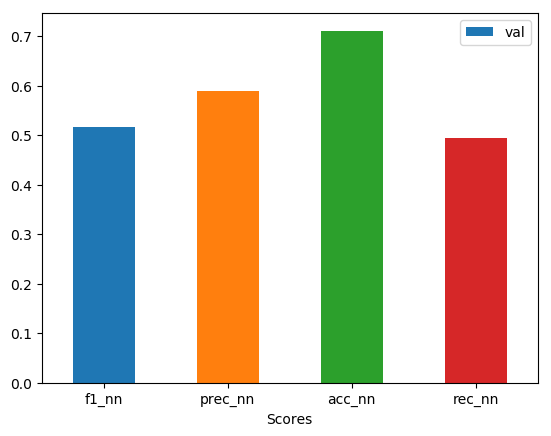

In [179]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy
nmm = numpy.asarray(y_predict)
nn = np.zeros_like(y_predict)
nn[np.arange(len(y_predict)), y_predict.argmax(1)] = 1

#y_naive=nn

#print(y_naive)
#cm_nn=confusion_matrix(Y_test,y_naive)
f1_nn=round(f1_score(Y_test, nn, average = 'macro'), 5)
prec_nn=precision_score(Y_test, nn, average="macro")
acc_nn=accuracy_score(Y_test,nn)
rec_nn=recall_score(Y_test, nn,average='macro')
print('F1 score:',f1_nn )
#print('CM \n',cm_nn)
print('Precision \n',prec_nn)
print('Accuracy Score \n',acc_nn)
print('Recall \n',rec_nn)

neural=np.array([f1_nn,prec_nn,acc_nn,rec_nn])
print(neural)   


